###  PCA Commentary on the Dataset

Let  
$$
X = \begin{bmatrix}
2.5 & 2.4 \\
0.5 & 0.7 \\
2.2 & 2.9 \\
1.9 & 2.2 \\
3.1 & 3.0 \\
2.3 & 2.7 \\
2.0 & 1.6 \\
1.0 & 1.1 \\
1.5 & 1.6 \\
1.1 & 0.9
\end{bmatrix}
\in \mathbb{R}^{10 \times 2}
$$

Each row is an observation, and each column is a feature (e.g., `height` and `weight`).

---

####  Step 1: Centering the Data

We compute the column-wise mean:
$$
\mu = \frac{1}{10} \sum_{i=1}^{10} X_i
$$

Then subtract it:
$$
X_{\text{centered}} = X - \mu
$$

---

####  Step 2: Covariance Matrix

We compute the empirical covariance matrix:
$$
\Sigma = \frac{1}{n - 1} X_{\text{centered}}^\top X_{\text{centered}} \in \mathbb{R}^{2 \times 2}
$$

This captures the variance and correlation between the two features.

---

####  Step 3: Eigen Decomposition

We solve:
$$
\Sigma v = \lambda v
$$

to find eigenvalues $ \lambda_1, \lambda_2 $ and eigenvectors $ v_1, v_2 $, which define the **principal components**.

In this dataset:

- The **first principal component** explains the majority of the variance and lies along a direction combining both height and weight.
- The **second component** is orthogonal to the first and explains the residual variance.

Since the eigenvalues are highly unequal (e.g., $ \lambda_1 \gg \lambda_2 $), **most of the structure in the data lies along a single direction**.

---

####  Step 4: Projection

To reduce dimensionality:
$$
Z = X_{\text{centered}} \cdot V_k
$$

where $ V_k \in \mathbb{R}^{2 \times k} $ contains the top $ k $ eigenvectors.

For $ k = 1 $, the data is projected onto the line of maximum variance — a 1D summary of 2D data.

---


In [36]:
import numpy as np
from scipy.linalg import eigh

# Example data (rows = samples, columns = [height and weight])
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# Step 1: Center the data 
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
# X_centered = X - μ, where μ = mean(X, axis=0)

In [37]:

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
# Σ = (1 / (n - 1)) * X_centeredᵀ @ X_centered
cov_matrix


array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [38]:

# Step 3: Compute eigenvalues and eigenvectors (sorted descending)
eigvals, eigvecs = eigh(cov_matrix)  # eigh because covariance matrix is symmetric
# Solve: Σv = λv → find eigenvalues λ and eigenvectors v
sorted_idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_idx]
eigvecs = eigvecs[:, sorted_idx]
print(eigvals)
print(eigvecs)


[1.28402771 0.0490834 ]
[[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]


In [39]:

# Step 4: Project data onto the principal components
X_pca = X_centered @ eigvecs  # you can also slice eigvecs[:, :k] to reduce dimensions
# Z = X_centered @ V, where V is the matrix of eigenvectors (principal axes)
# Output
print("Eigenvalues:\n", eigvals)
print("Eigenvectors (columns = PCs):\n", eigvecs)
print("Projected Data:\n", X_pca)


Eigenvalues:
 [1.28402771 0.0490834 ]
Eigenvectors (columns = PCs):
 [[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]
Projected Data:
 [[ 0.82797019 -0.17511531]
 [-1.77758033  0.14285723]
 [ 0.99219749  0.38437499]
 [ 0.27421042  0.13041721]
 [ 1.67580142 -0.20949846]
 [ 0.9129491   0.17528244]
 [-0.09910944 -0.3498247 ]
 [-1.14457216  0.04641726]
 [-0.43804614  0.01776463]
 [-1.22382056 -0.16267529]]


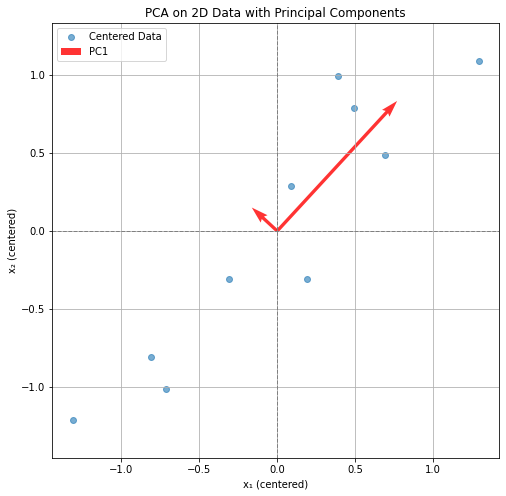

In [40]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(8, 8))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6, label='Centered Data')

# Plot principal axes
origin = np.zeros(2)
scale = 1  # just for visual clarity

for i in range(2):
    vec = eigvecs[:, i] * np.sqrt(eigvals[i]) * scale
    plt.quiver(*origin, *vec, angles='xy', scale_units='xy', scale=1, color='r', alpha=0.8, label=f'PC{i+1}' if i == 0 else None)

# Add labels and formatting
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.xlabel('x₁ (centered)')
plt.ylabel('x₂ (centered)')
plt.title('PCA on 2D Data with Principal Components')
plt.grid(True)
plt.axis('equal')
# plt.ylim(-2,4)
plt.legend()
plt.show()
